In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/creditcard.csv')

Most legit transactions are small. Large = higher risk.

In [ ]:
#Transaction Amount Flag
df['High_Amount'] = df['Amount'].apply(lambda x: 1 if x > 200 else 0)

Fraud spikes during off hours (10 PM–5 AM)

In [ ]:
#Night-Time Transaction Flag
df['Night_Transaction'] = df['Time'].apply(lambda x: 1 if (x % 86400) >= 79200 or (x % 86400) <= 18000 else 0)

Captures “surprisingly large” transactions

In [ ]:
#Amount Z-Score
df['Amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

High volume in small window → likely fraud

In [ ]:
#Transaction per 10-minute Window
df['Time_Min'] = df['Time'] // 60
tx_per_min = df.groupby('Time_Min')['Amount'].count()
df['Tx_Count_10min'] = df['Time_Min'].apply(lambda x: tx_per_min.loc[x-5:x+5].sum())

Helps track sudden spikes or dips

In [ ]:
#Rolling Mean Transaction Amount
rolling_mean = df['Amount'].rolling(window=10).mean().fillna(df['Amount'].mean())
df['Rolling_Avg_Amount'] = rolling_mean

In [ ]:
#Drop unused or temp cols
df.drop(['Time_Min'], axis=1, inplace=True)

In [ ]:
df[['Amount', 'High_Amount', 'Night_Transaction', 'Amount_zscore', 'Tx_Count_10min', 'Rolling_Avg_Amount']].head(10)

,Amount,High_Amount,Night_Transaction,Amount_zscore,Tx_Count_10min,Rolling_Avg_Amount
0,149.62,0,1,0.244964,491,88.349619
1,2.69,0,1,-0.342474,491,88.349619
2,378.66,1,1,1.160684,491,88.349619
3,123.50,0,1,0.140534,491,88.349619
4,69.99,0,1,-0.073403,491,88.349619
5,3.67,0,1,-0.338556,491,88.349619
6,4.99,0,1,-0.333278,491,88.349619
7,40.80,0,1,-0.190107,491,88.349619
8,93.20,0,1,0.019392,491,88.349619
9,3.68,0,1,-0.338516,491,87.080000


Text(0.5, 1.0, 'Transactions in 10-Minute Window by Class')

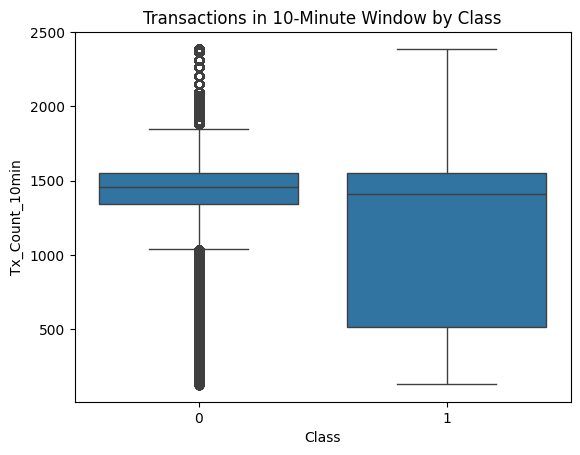

In [ ]:
sns.boxplot(x='Class', y='Tx_Count_10min', data=df)
plt.title("Transactions in 10-Minute Window by Class")

Text(0.5, 1.0, 'Rolling Avg Amount by Fraud/Legit')

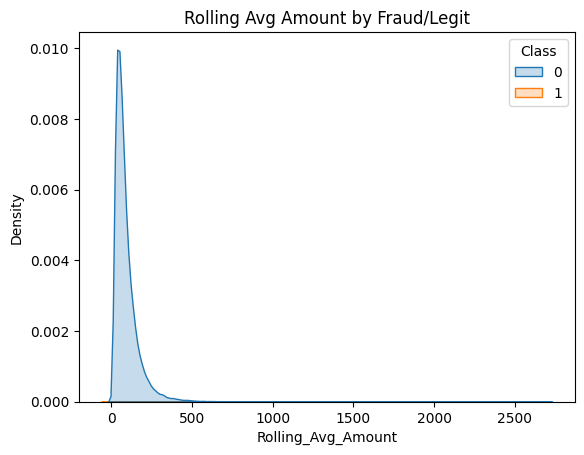

In [ ]:
sns.kdeplot(data=df, x='Rolling_Avg_Amount', hue='Class', fill=True)
plt.title("Rolling Avg Amount by Fraud/Legit")